# Exploratory Data Analysis

In [1]:
#importing the libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import requests
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Check none value
def checkNone(givenlist, value):
    """
    This function Check none value in a list.
    
    arguments: list
    returns: Boolean index
    
    """
    return all([element == value for element in givenlist])


# Create profit
def prof(df, rev, bug, out):
    """
    This function Create profit to a dataframe.
    
    arguments: dataframe and corresponding variables
    returns: profit column
    
    """
    for i in range(df.shape[0]):
        if df[bug][i] == 0 or df[rev][i] == 0:
            df[out][i] = 0
        else:
            df[out][i] = df[rev][i] - df[bug][i]

    return df[out]


# Create roi
def roi(df, rev, bug, out):
    """
    This function Create ROI to a dataframe.
    
    arguments: dataframe and corresponding variables
    returns: ROI column
    
    """
    for i in range(df.shape[0]):
        if df[bug][i] == 0 or df[rev][i] == 0:
            df[out][i] = 0
        else:
            df[out][i] = (df[rev][i] - df[bug][i]) / df[bug][i]

    return df[out]

# Data Extraction

In [3]:
movies = pd.read_csv("E:\\New folder\\Data science\\Movie recommendation System\\movies_metadata.csv")

In [4]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


# Data Cleaning

In [6]:
# Droping not usefull variables and dirty rows, assign a new dataframe to make word cloud
movies = movies[movies['adult'].isin(['False','True'])]
movies.drop(['belongs_to_collection', 'production_companies','spoken_languages','poster_path','homepage'], axis=1, inplace=True)
movies.reset_index(drop=True, inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  object 
 1   budget                45463 non-null  object 
 2   genres                45463 non-null  object 
 3   id                    45463 non-null  object 
 4   imdb_id               45446 non-null  object 
 5   original_language     45452 non-null  object 
 6   original_title        45463 non-null  object 
 7   overview              44509 non-null  object 
 8   popularity            45460 non-null  object 
 9   production_countries  45460 non-null  object 
 10  release_date          45376 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  status                45379 non-null  object 
 14  tagline               20412 non-null  object 
 15  title              

In [7]:
movies.drop(['imdb_id'], axis=1, inplace=True)
movies.reset_index(drop=True, inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  object 
 1   budget                45463 non-null  object 
 2   genres                45463 non-null  object 
 3   id                    45463 non-null  object 
 4   original_language     45452 non-null  object 
 5   original_title        45463 non-null  object 
 6   overview              44509 non-null  object 
 7   popularity            45460 non-null  object 
 8   production_countries  45460 non-null  object 
 9   release_date          45376 non-null  object 
 10  revenue               45460 non-null  float64
 11  runtime               45203 non-null  float64
 12  status                45379 non-null  object 
 13  tagline               20412 non-null  object 
 14  title                 45460 non-null  object 
 15  video              

In [8]:
#Drop duplicate rows
dup_data = movies.duplicated(keep=False)
movies=movies[~dup_data]

In [9]:
movies.isnull().sum()

adult                       0
budget                      0
genres                      0
id                          0
original_language          11
original_title              0
overview                  954
popularity                  3
production_countries        3
release_date               87
revenue                     3
runtime                   260
status                     84
tagline                 25033
title                       3
video                       3
vote_average                3
vote_count                  3
dtype: int64

In [10]:
#Filling the null values with mean and unknown
movies['runtime']=movies['runtime'].fillna(value=pd.Series(movies['runtime']).mean())
movies['release_date']=movies['release_date'].fillna("unknown")
movies['original_language']=movies['original_language'].fillna("En")
movies['overview']=movies['overview'].fillna(value= " ")
movies['status']=movies['status'].fillna("unknown")
movies['tagline']=movies['tagline'].fillna(value="")

In [11]:
movies.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
overview                0
popularity              3
production_countries    3
release_date            0
revenue                 3
runtime                 0
status                  0
tagline                 0
title                   3
video                   3
vote_average            3
vote_count              3
dtype: int64

In [12]:
#removing the rows with NA value
movies.dropna(axis=0 ,how='any',inplace=True)
movies.reset_index(drop=True,inplace=True)
movies.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
overview                0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
tagline                 0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [13]:
movies


,adult,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45430,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",unknown,0.0,90.0,Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45431,False,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,Released,,Century of Birthing,False,9.0,3.0
45432,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45433,False,0,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,Released,,Satan Triumphant,False,0.0,0.0


In [14]:
#now to simplify the values of 'genres','production_countries'
import ast 
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [15]:
movies['genres']=movies['genres'].apply(convert)
movies['production_countries']=movies['production_countries'].apply(convert)

In [16]:
movies


,adult,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count
0,False,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[United States of America],1995-10-30,373554033.0,81.0,Released,,Toy Story,False,7.7,5415.0
1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,[United States of America],1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,[United States of America],1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[United States of America],1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,[United States of America],1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45430,False,0,"[Drama, Family]",439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[Iran],unknown,0.0,90.0,Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45431,False,0,[Drama],111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,[Philippines],2011-11-17,0.0,360.0,Released,,Century of Birthing,False,9.0,3.0
45432,False,0,"[Action, Drama, Thriller]",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[United States of America],2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45433,False,0,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Russia],1917-10-21,0.0,87.0,Released,,Satan Triumphant,False,0.0,0.0


In [19]:

#for removing the brackets from the value: 
def remove_brackets(value):
    # Check if the value is a list
    if isinstance(value, list) and len(value) > 0:
        # If it is a list, extract the first element and strip brackets
        return value[0].strip('[]')
    else:
        # If it's not a list or an empty list, return the original value
        return value

In [20]:

movies['genres']= movies['genres'].apply(remove_brackets)

In [22]:

movies['production_countries']= movies['production_countries'].apply(remove_brackets)


In [23]:
movies

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count
0,False,30000000,Animation,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,81.0,Released,,Toy Story,False,7.7,5415.0
1,False,65000000,Adventure,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,0,Romance,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,United States of America,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,16000000,Comedy,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45430,False,0,Drama,439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,Iran,unknown,0.0,90.0,Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45431,False,0,Drama,111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,Philippines,2011-11-17,0.0,360.0,Released,,Century of Birthing,False,9.0,3.0
45432,False,0,Action,67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45433,False,0,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Russia,1917-10-21,0.0,87.0,Released,,Satan Triumphant,False,0.0,0.0


In [25]:
#lets merge two columns 'original_title' and 'title' as they are containing same values and drop old columns
movies['Title']=movies['original_title'].fillna(movies['title'])
movies = movies.drop(['original_title','title'],axis=1)
movies


,adult,budget,genres,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,Title
0,False,30000000,Animation,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,81.0,Released,,False,7.7,5415.0,Toy Story
1,False,65000000,Adventure,8844,en,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,Jumanji
2,False,0,Romance,15602,en,A family wedding reignites the ancient feud be...,11.7129,United States of America,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,Grumpier Old Men
3,False,16000000,Comedy,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34.0,Waiting to Exhale
4,False,0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45430,False,0,Drama,439050,fa,Rising and falling between a man and woman.,0.072051,Iran,unknown,0.0,90.0,Released,Rising and falling between a man and woman,False,4.0,1.0,رگ خواب
45431,False,0,Drama,111109,tl,An artist struggles to finish his work while a...,0.178241,Philippines,2011-11-17,0.0,360.0,Released,,False,9.0,3.0,Siglo ng Pagluluwal
45432,False,0,Action,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,False,3.8,6.0,Betrayal
45433,False,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,Russia,1917-10-21,0.0,87.0,Released,,False,0.0,0.0,Satana likuyushchiy


In [26]:
movies.columns

Index(['adult', 'budget', 'genres', 'id', 'original_language', 'overview',
       'popularity', 'production_countries', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'video', 'vote_average', 'vote_count',
       'Title'],
      dtype='object')

In [27]:
new_column_order = ['adult', 'Title','original_language','runtime', 'release_date', 'budget', 'genres', 'id',  'overview',
       'popularity', 'production_countries',  'revenue','status', 'tagline', 'video', 'vote_average', 'vote_count']
movies=movies[new_column_order]
movies

,adult,Title,original_language,runtime,release_date,budget,genres,id,overview,popularity,production_countries,revenue,status,tagline,video,vote_average,vote_count
0,False,Toy Story,en,81.0,1995-10-30,30000000,Animation,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,373554033.0,Released,,False,7.7,5415.0
1,False,Jumanji,en,104.0,1995-12-15,65000000,Adventure,8844,When siblings Judy and Peter discover an encha...,17.015539,United States of America,262797249.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
2,False,Grumpier Old Men,en,101.0,1995-12-22,0,Romance,15602,A family wedding reignites the ancient feud be...,11.7129,United States of America,0.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
3,False,Waiting to Exhale,en,127.0,1995-12-22,16000000,Comedy,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,81452156.0,Released,Friends are the people who let you be yourself...,False,6.1,34.0
4,False,Father of the Bride Part II,en,106.0,1995-02-10,0,Comedy,11862,Just when George Banks has recovered from his ...,8.387519,United States of America,76578911.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45430,False,رگ خواب,fa,90.0,unknown,0,Drama,439050,Rising and falling between a man and woman.,0.072051,Iran,0.0,Released,Rising and falling between a man and woman,False,4.0,1.0
45431,False,Siglo ng Pagluluwal,tl,360.0,2011-11-17,0,Drama,111109,An artist struggles to finish his work while a...,0.178241,Philippines,0.0,Released,,False,9.0,3.0
45432,False,Betrayal,en,90.0,2003-08-01,0,Action,67758,"When one of her hits goes wrong, a professiona...",0.903007,United States of America,0.0,Released,A deadly game of wits.,False,3.8,6.0
45433,False,Satana likuyushchiy,en,87.0,1917-10-21,0,[],227506,"In a small town live two brothers, one a minis...",0.003503,Russia,0.0,Released,,False,0.0,0.0


In [28]:
#turn to float type
floatvar=('budget','popularity','revenue','runtime','vote_average','vote_count')
for i in floatvar:
    movies[i]=movies[i].astype(float)

In [29]:
#create profit and roi
movies['profit']=0
movies['profit']=prof(movies,rev='revenue',bug='budget',out='profit')
movies['roi']=1.0
movies['roi']=roi(movies,rev='revenue',bug='budget',out='roi')


In [30]:
movies[movies['profit']==0].count()

adult                   40074
Title                   40074
original_language       40074
runtime                 40074
release_date            40074
budget                  40074
genres                  40074
id                      40074
overview                40074
popularity              40074
production_countries    40074
revenue                 40074
status                  40074
tagline                 40074
video                   40074
vote_average            40074
vote_count              40074
profit                  40074
roi                     40074
dtype: int64

In [31]:
#Creating gain feature
movies['gain']=False
for i in range (movies.shape[0]):
    if movies['profit'][i]> 0:
        movies['gain'][i] = True
    elif movies['profit'][i]< 0:
        movies['gain'][i] = False
    else:movies['gain'][i] ="Unknown"

In [33]:
#Data cleaning is all done
semovies.to_csv('test.csv',header=True)

In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45435 entries, 0 to 45434
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45435 non-null  object 
 1   Title                 45435 non-null  object 
 2   original_language     45435 non-null  object 
 3   runtime               45435 non-null  float64
 4   release_date          45435 non-null  object 
 5   budget                45435 non-null  float64
 6   genres                45435 non-null  object 
 7   id                    45435 non-null  object 
 8   overview              45435 non-null  object 
 9   popularity            45435 non-null  float64
 10  production_countries  45435 non-null  object 
 11  revenue               45435 non-null  float64
 12  status                45435 non-null  object 
 13  tagline               45435 non-null  object 
 14  video                 45435 non-null  object 
 15  vote_average       

# Lets begin the EDA

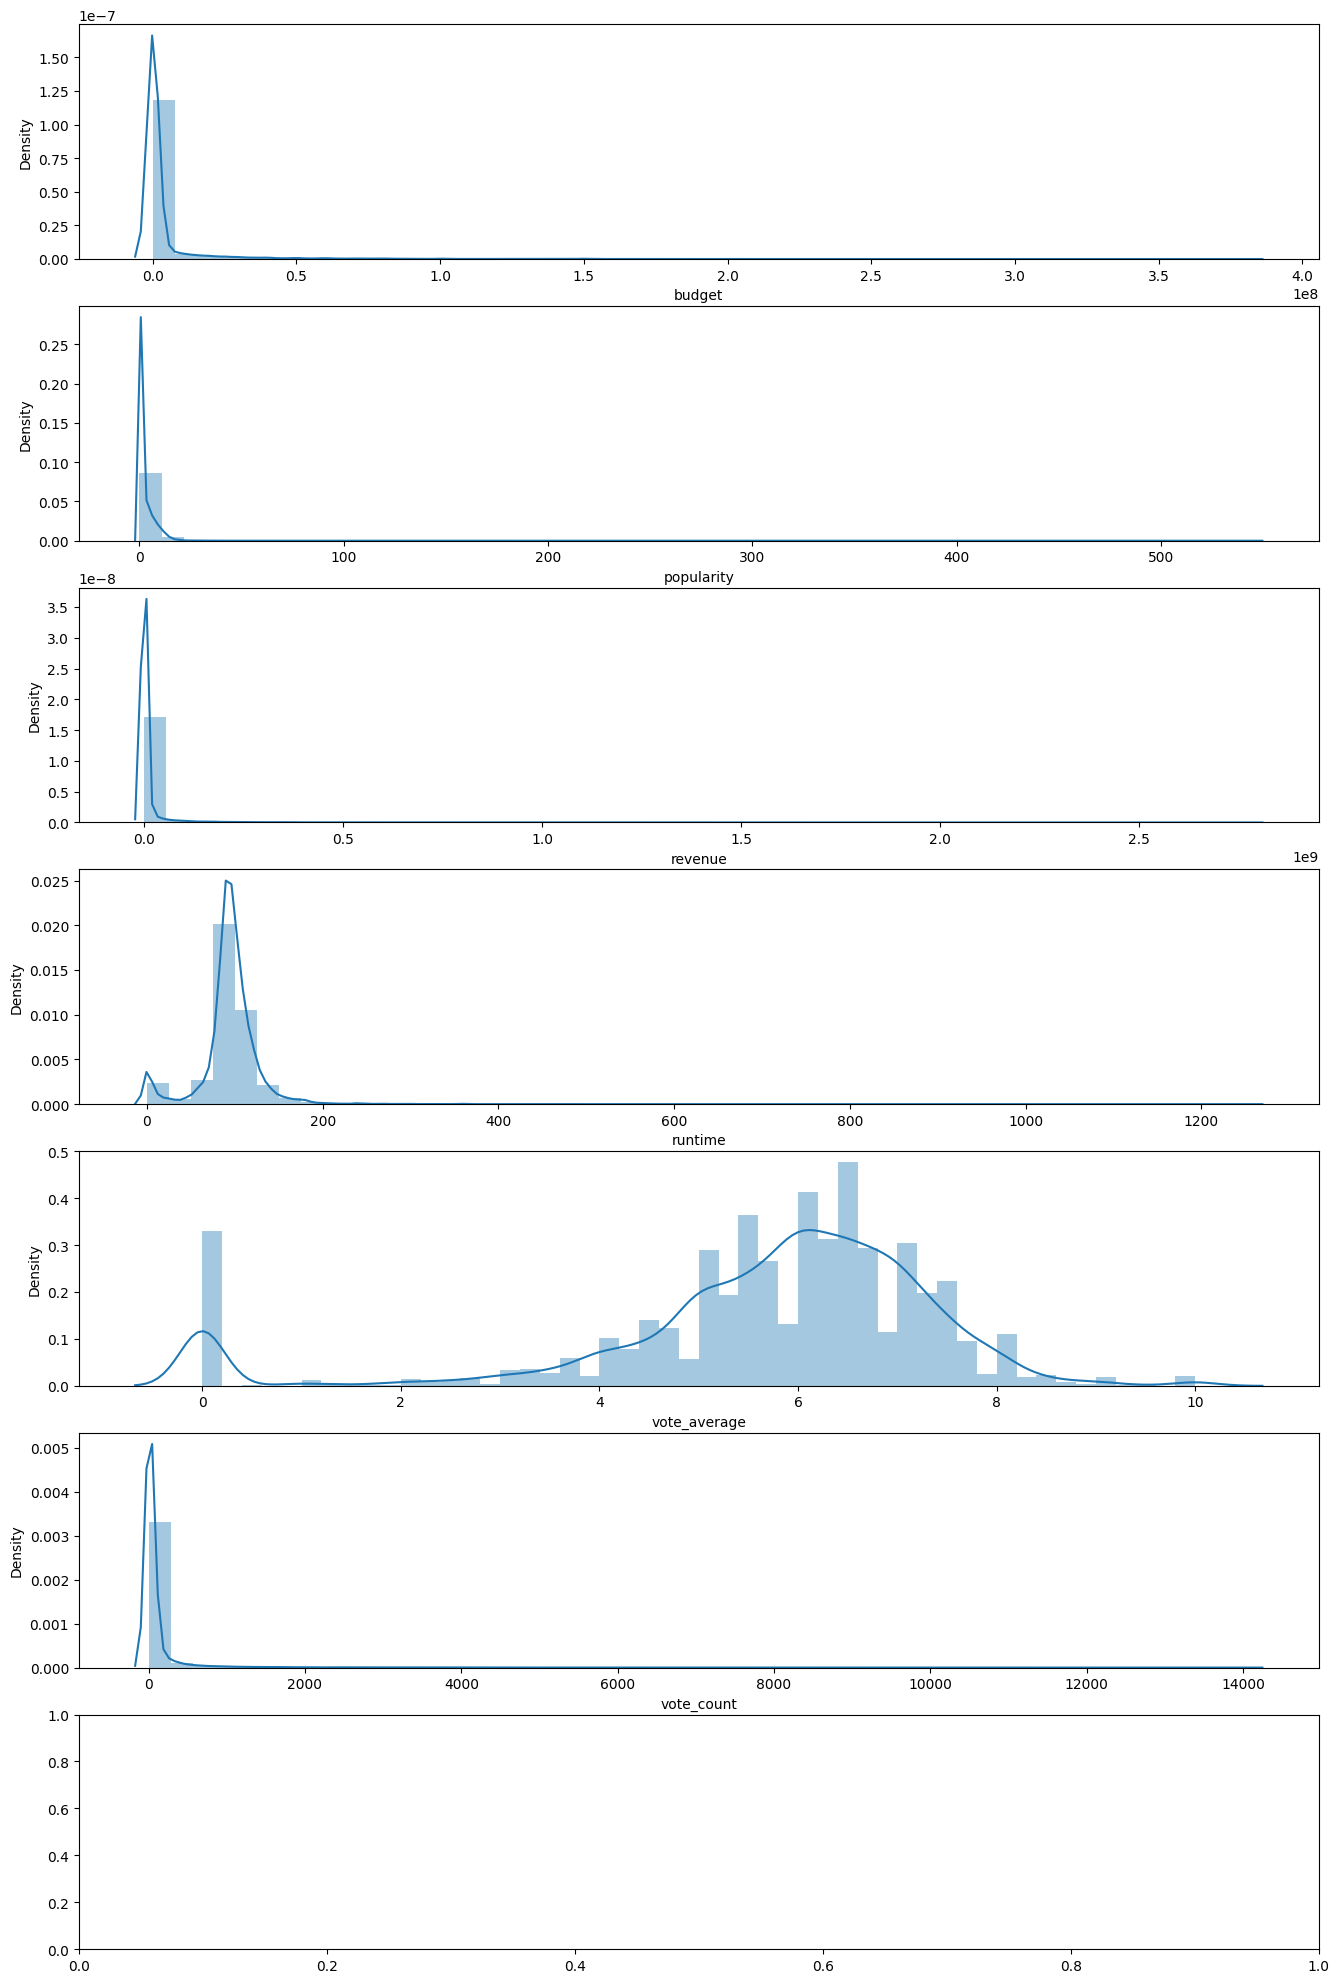

In [35]:
#Density plot for numerical data
fig,axes =  plt.subplots(7,1,figsize=(16,25))
for i,d in zip (range(7),floatvar):
    sns.distplot(movies[d],ax=axes[i])

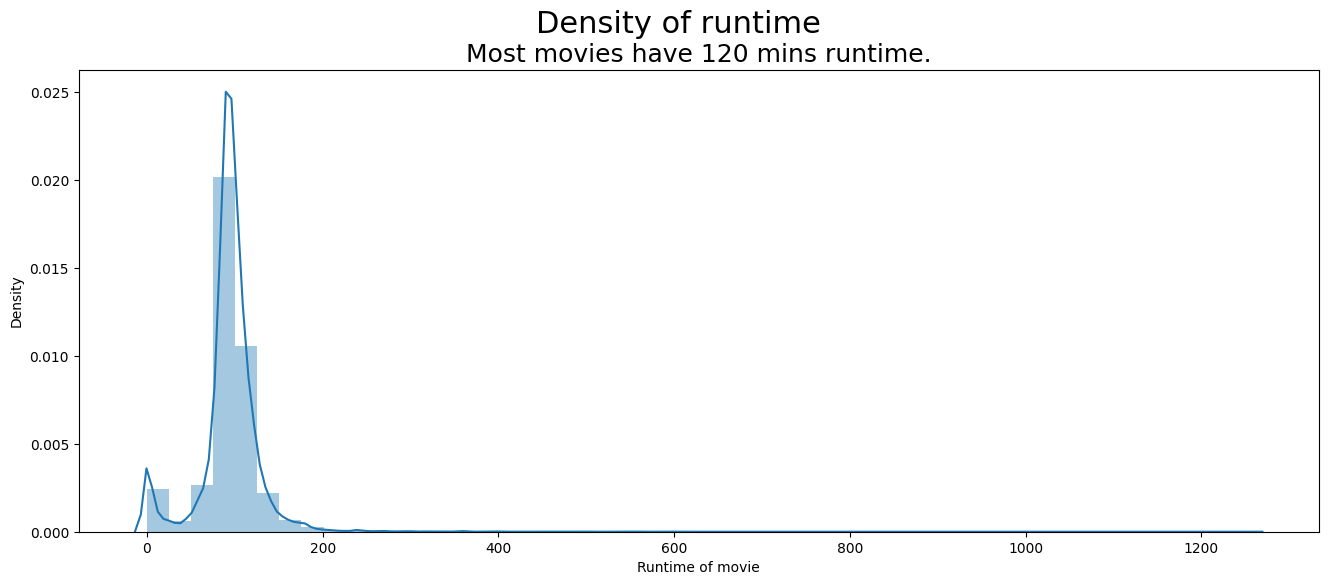

In [37]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(movies['runtime'])
plt.xlabel('Runtime of movie') 

plt.title("Most movies have 120 mins runtime.", fontsize = 18)
plt.suptitle('Density of runtime', fontsize = 22)
plt.show()

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import requests
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS

In [8]:
movies = pd.read_csv("E:\\New folder\\Data science\\Movie recommendation System\\movies_metadata.csv")

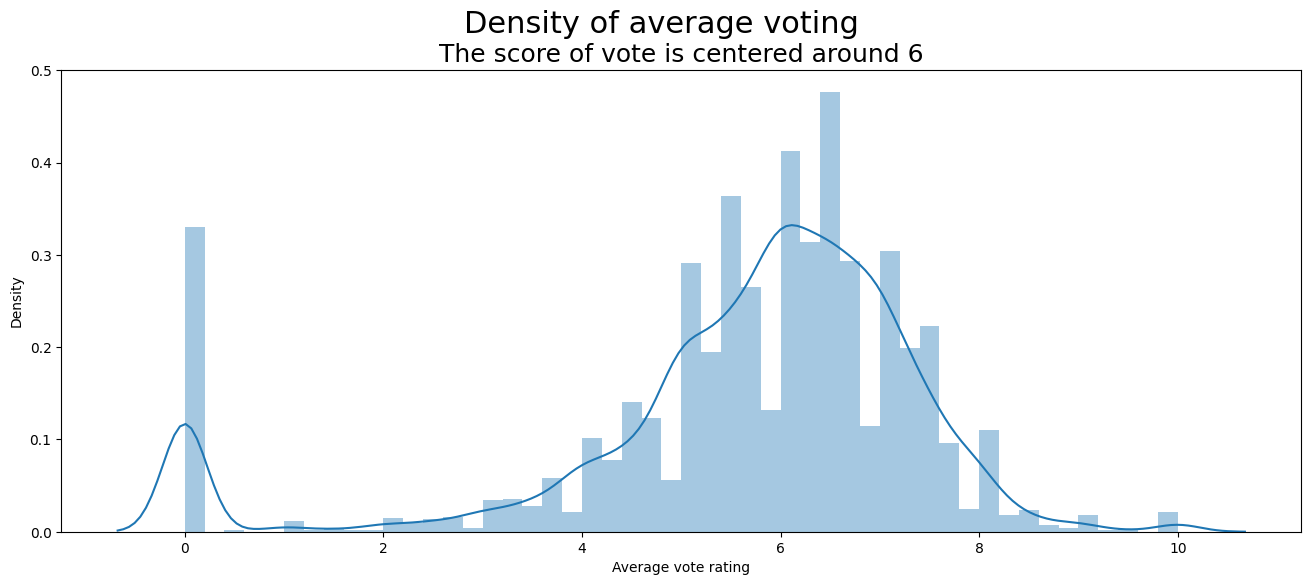

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(movies['vote_average'])
plt.xlabel('Average vote rating')

plt.title("The score of vote is centered around 6",fontsize=18)
plt.suptitle('Density of average voting',fontsize=22)
plt.show()


(0.0, 20000000.0)

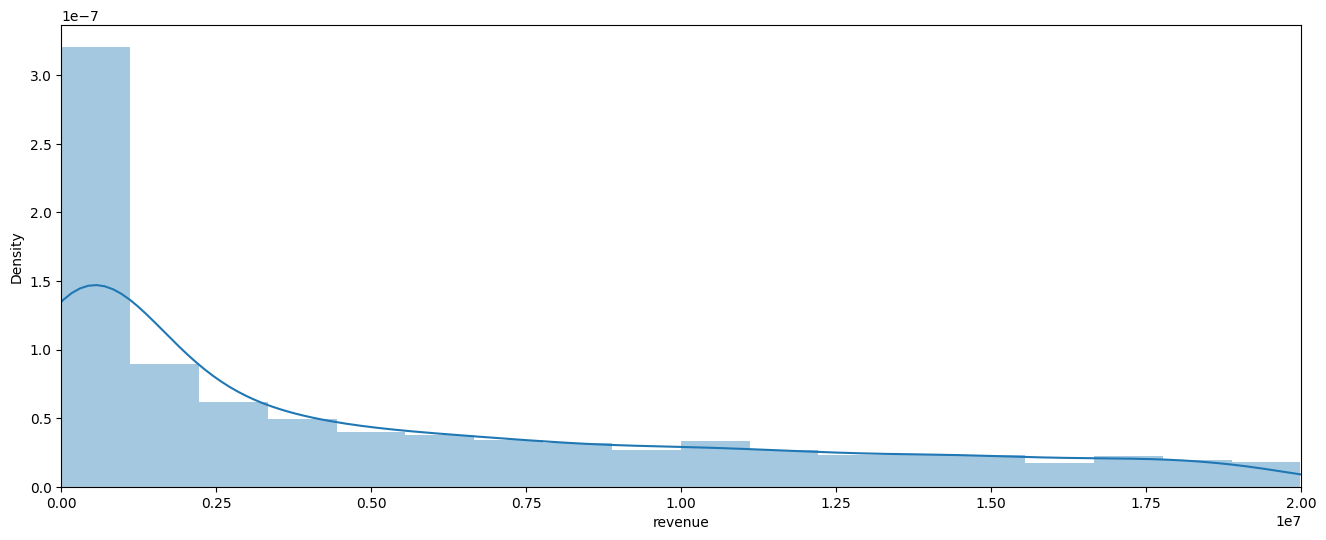

In [10]:
revenue_data = movies[movies['revenue'] < 20000000 ]
revenue_data = revenue_data[revenue_data['revenue'] != 0]
fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(revenue_data['revenue'])
plt.xlim(0,20000000)

We can see in above graph there is high density of movies who's revenue is almost equal to 0. These observations suggest that the distribution of movie revenue is right-skewed, with a high concentration of movies at lower revenue levels, and the density decreases as you move towards higher revenue levels.

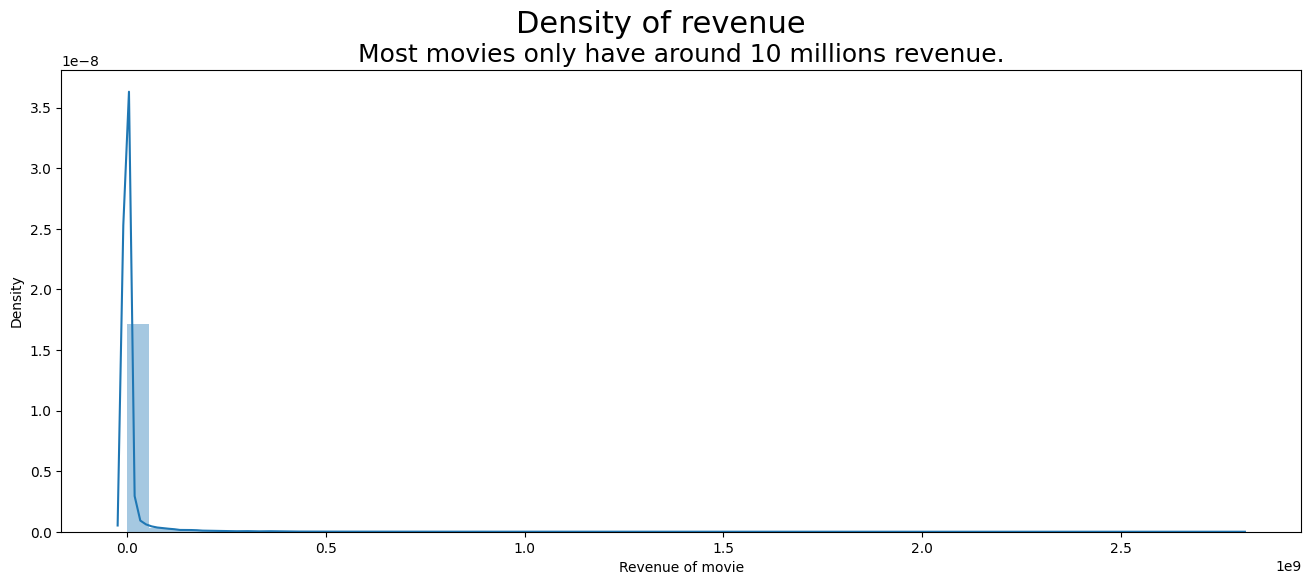

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(movies['revenue'])
plt.xlabel('Revenue of movie') 

plt.title("Most movies only have around 10 millions revenue.", fontsize = 18)
plt.suptitle('Density of revenue', fontsize = 22)
plt.show()

In [2]:
movies = pd.read_csv("E:\\New folder\\Data science\\Movie recommendation System\\movies_metadata.csv")

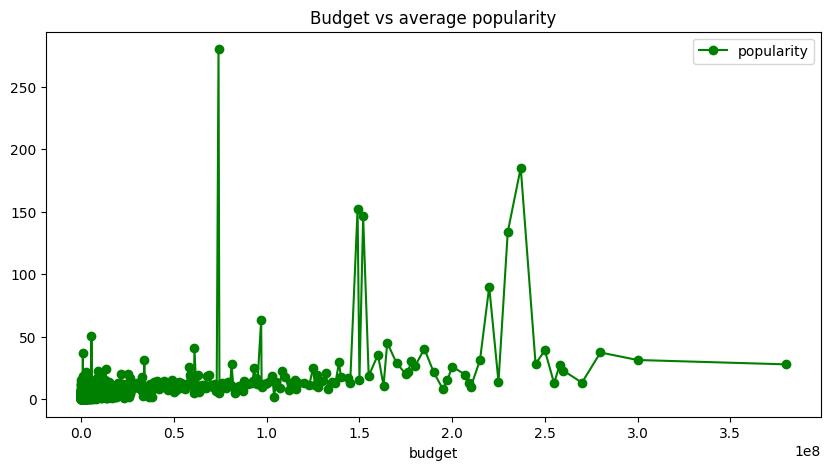

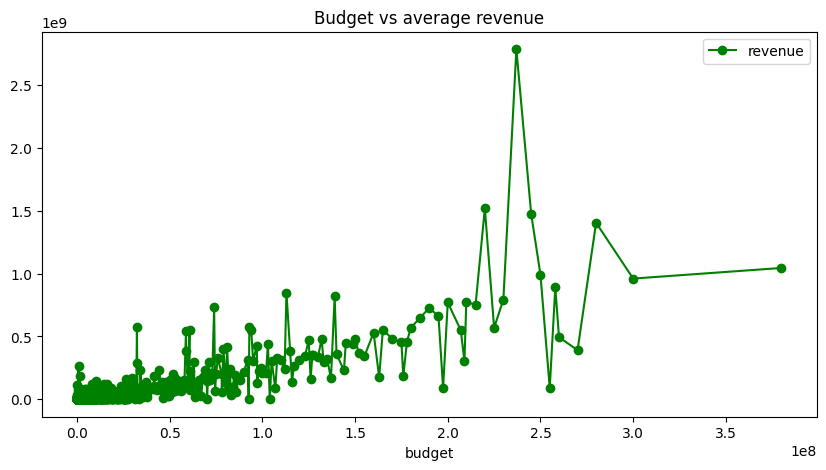

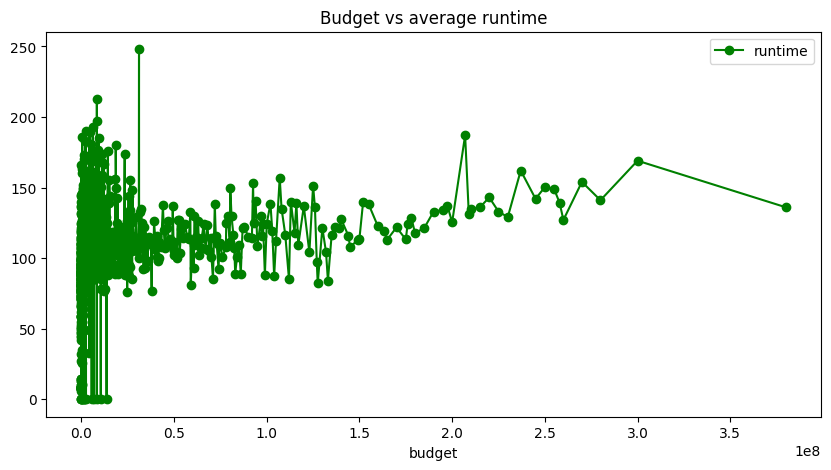

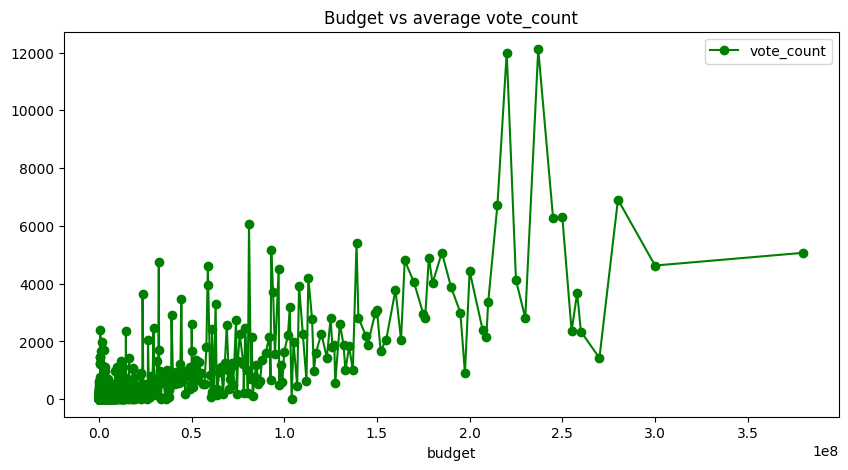

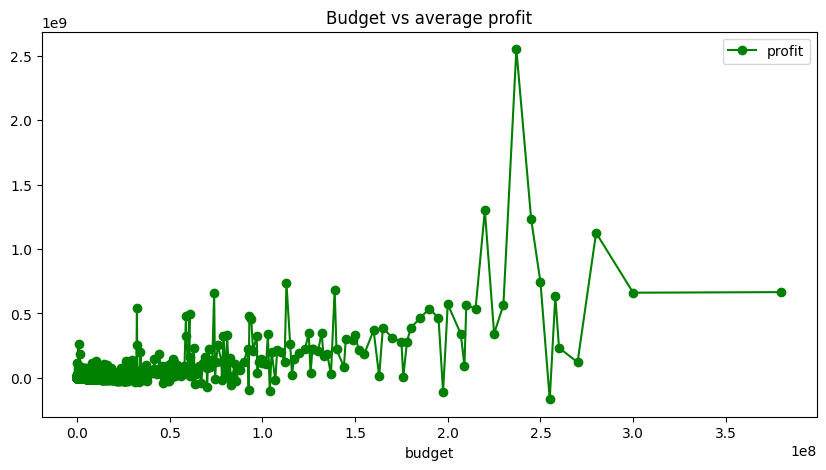

In [52]:
# scatter plot for average budget
for i in ('popularity','revenue','runtime','vote_count','profit'):
    axis = movies.groupby('budget')[[i]].mean().plot(figsize=(10,5),marker='o',color='g')
    plt.title(f"Budget vs average {i}")

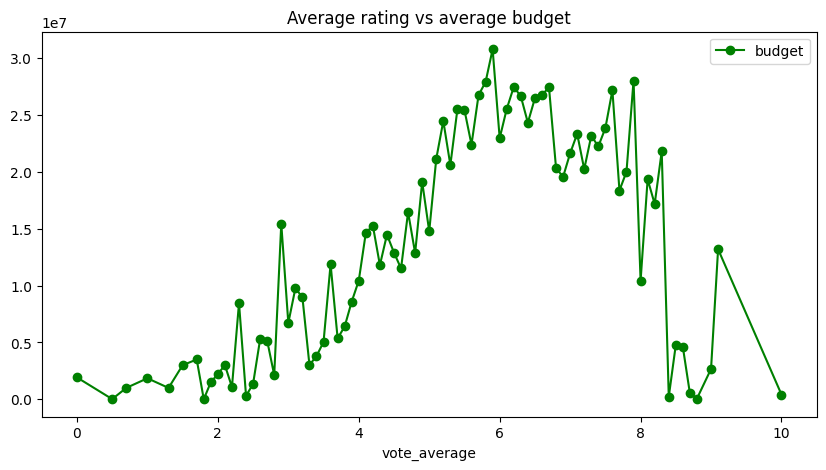

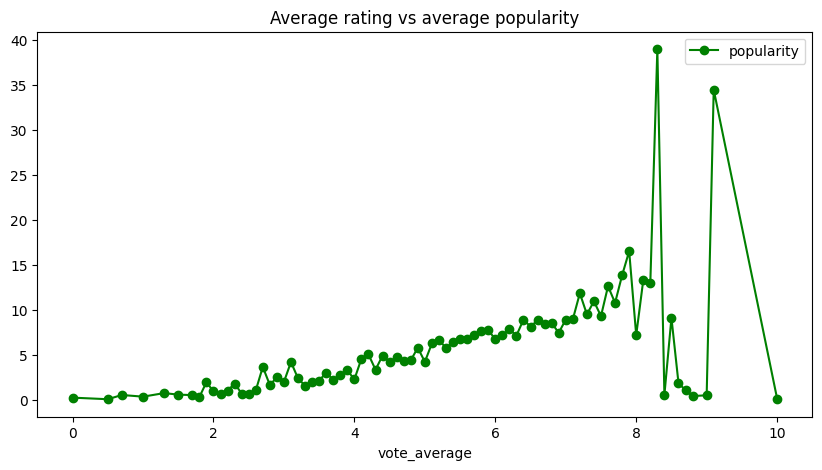

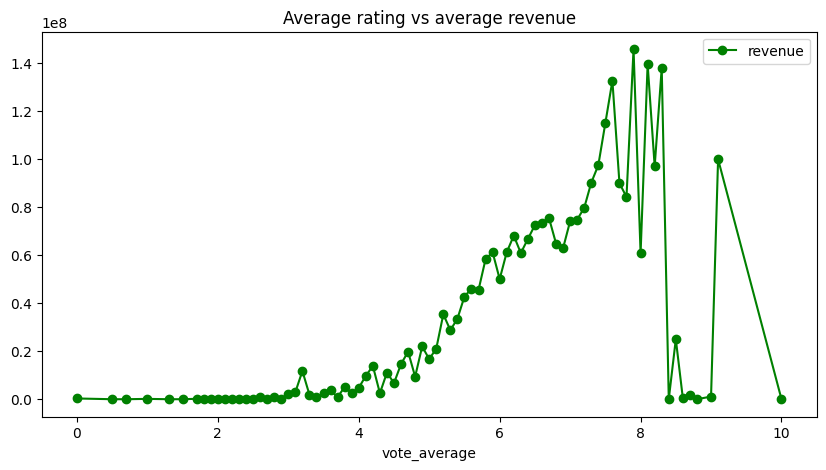

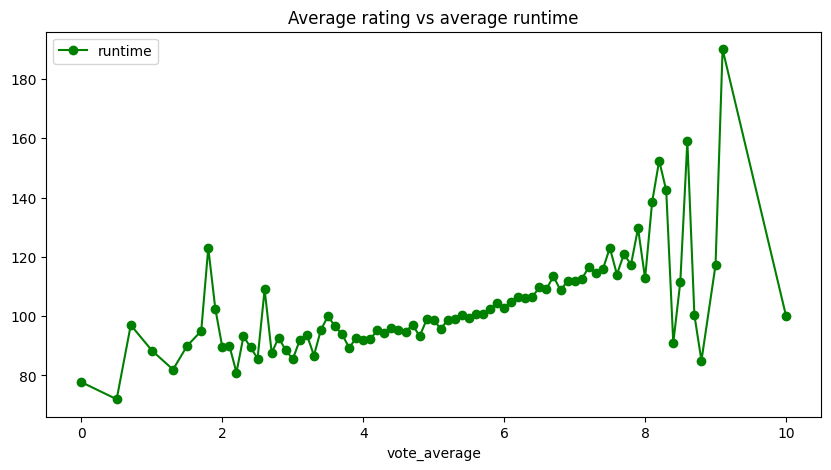

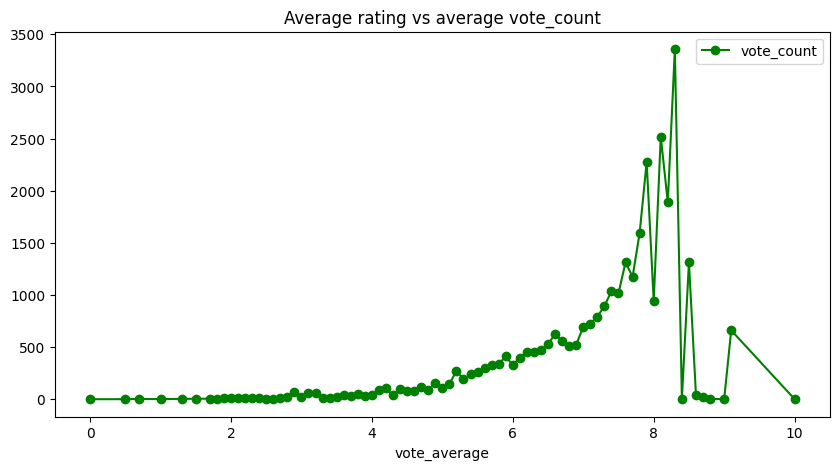

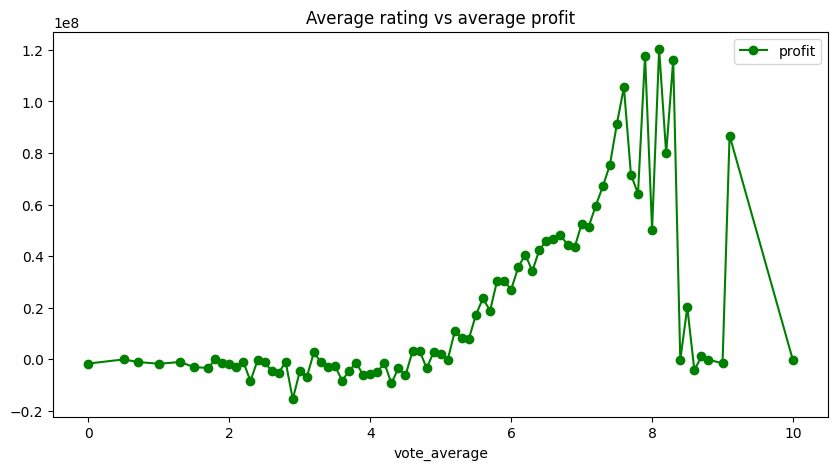

In [51]:
# scatter plot for average rating
plotdata = movies[movies['budget'] > 1000]
for i in ('budget','popularity','revenue','runtime','vote_count','profit'):
    axis = plotdata.groupby('vote_average')[[i]].mean().plot(figsize=(10,5),marker='o',color='g')
    plt.title(f"Average rating vs average {i}")

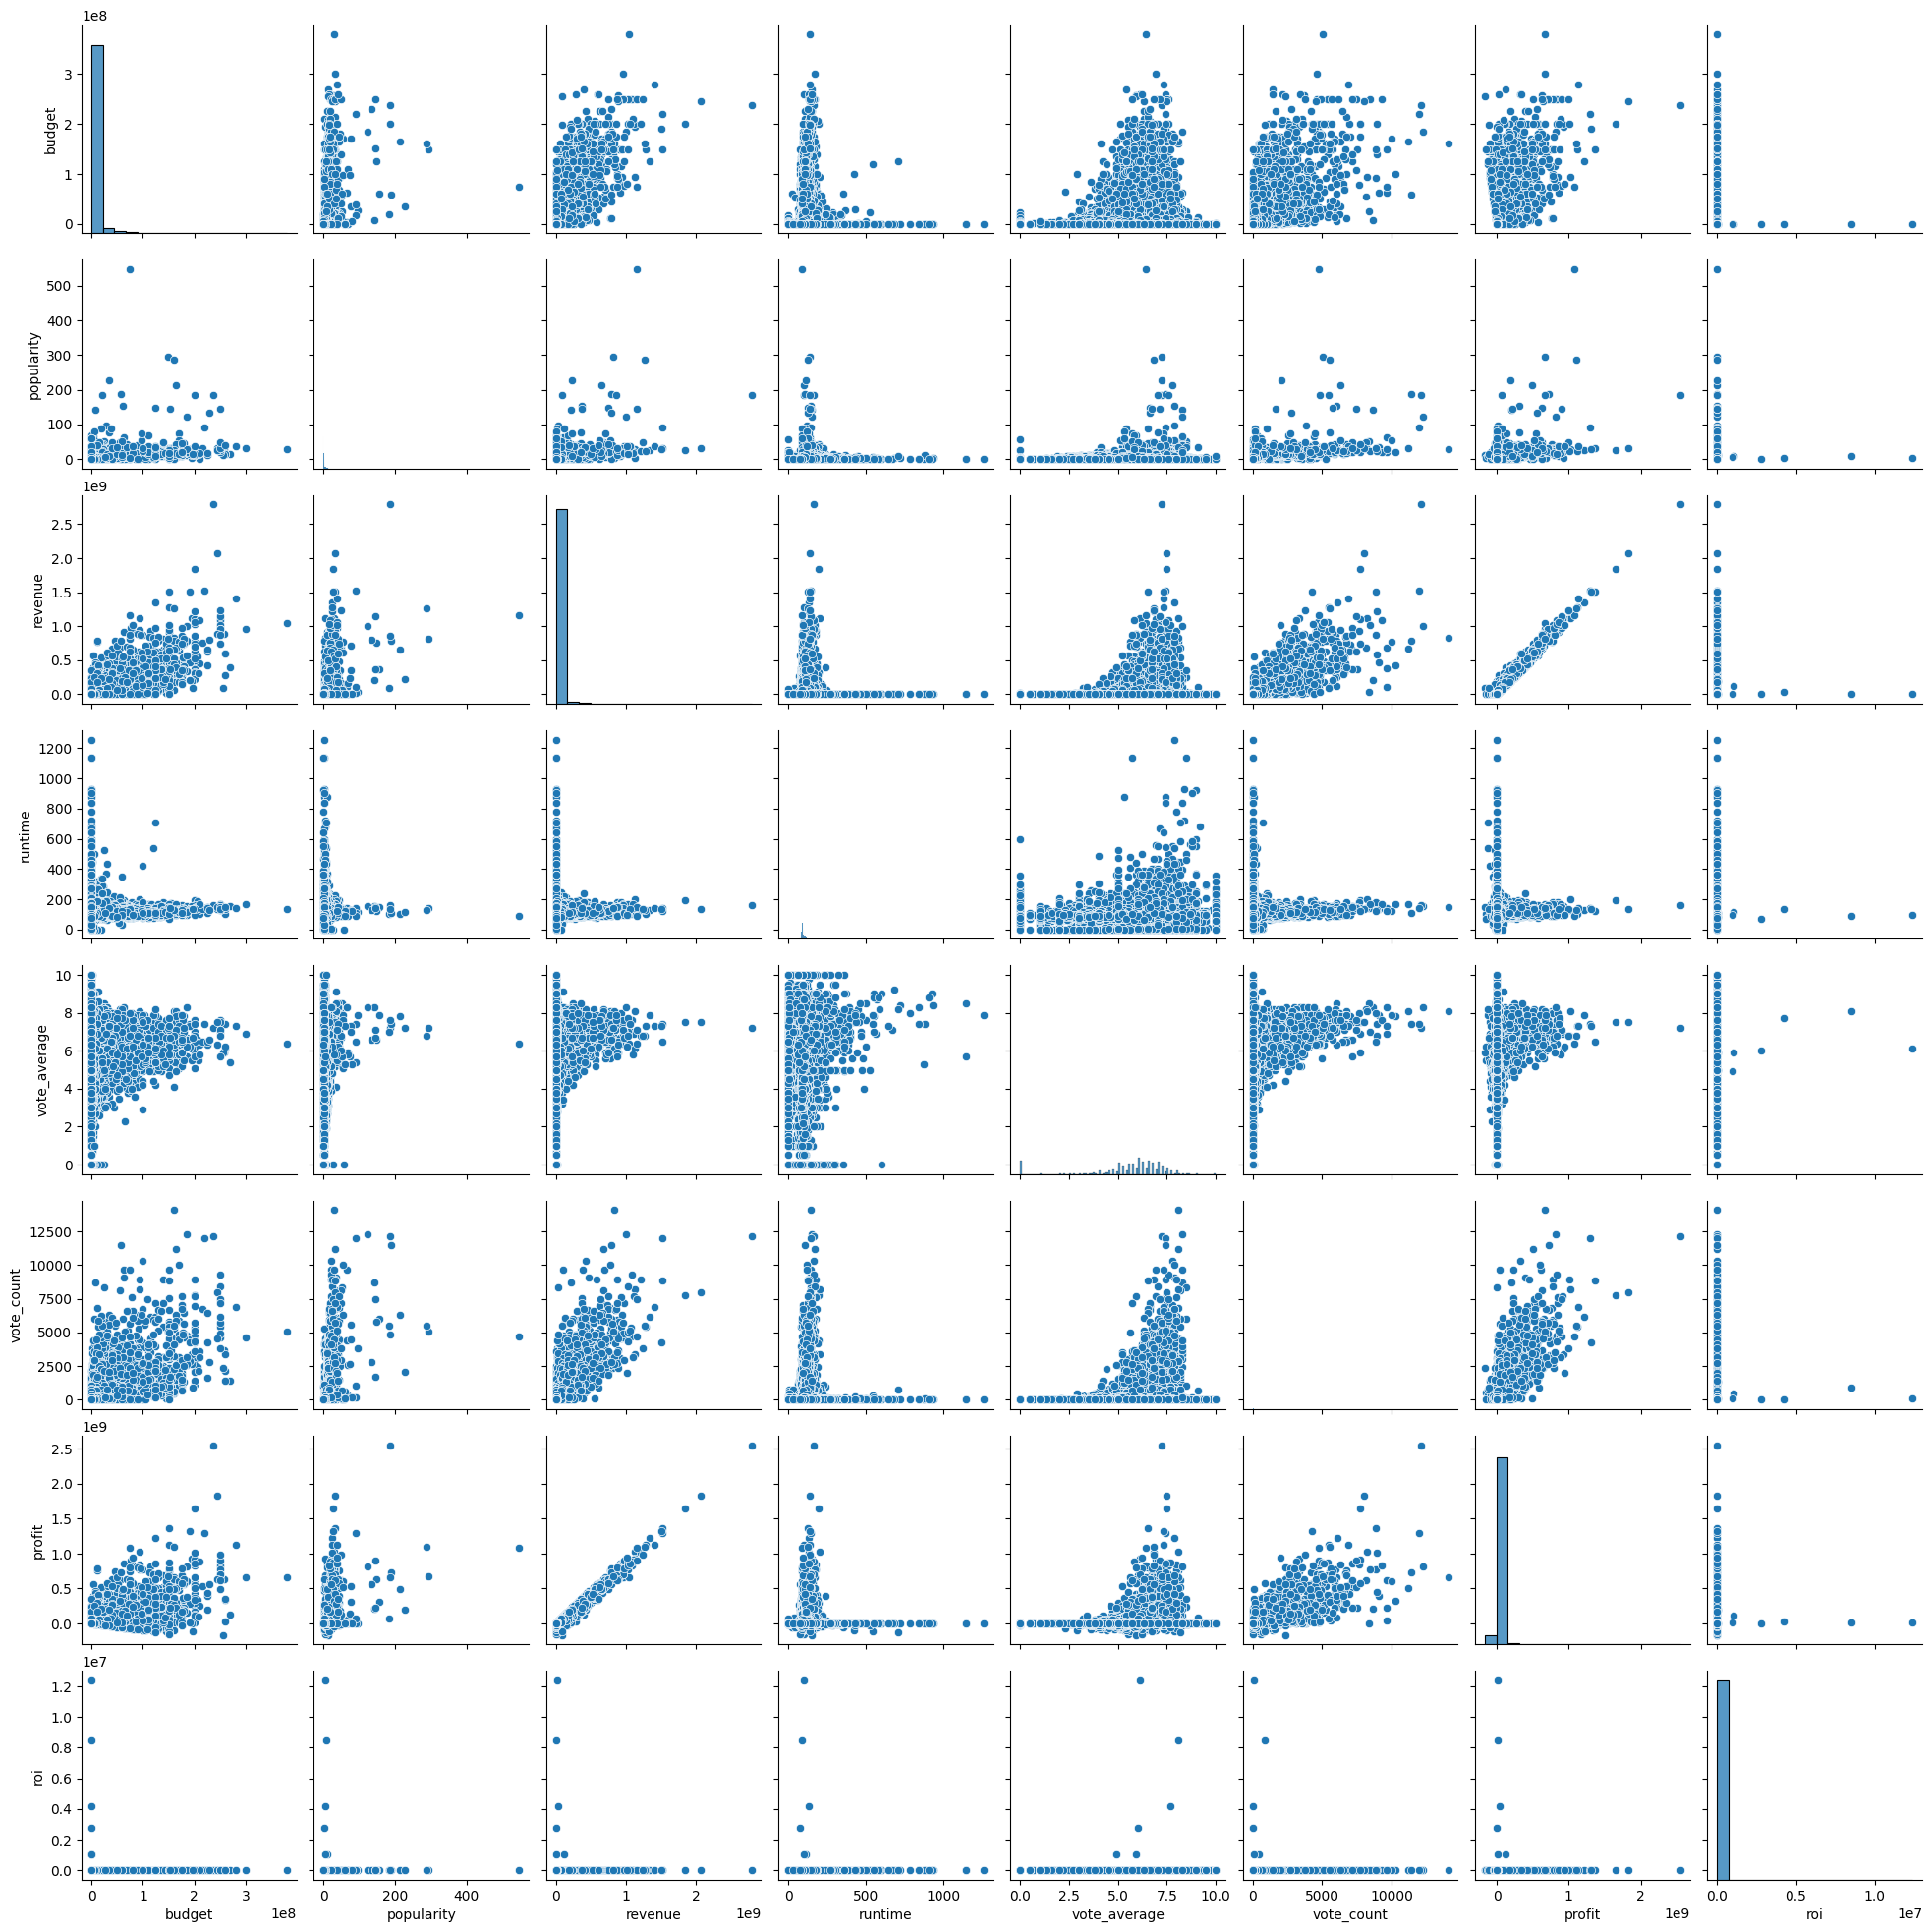

In [54]:
# pairplot
pairplotdata = movies[['budget','popularity','revenue','runtime','vote_average','vote_count','profit','roi']]
sns.pairplot(data=pairplotdata)
plt.show()

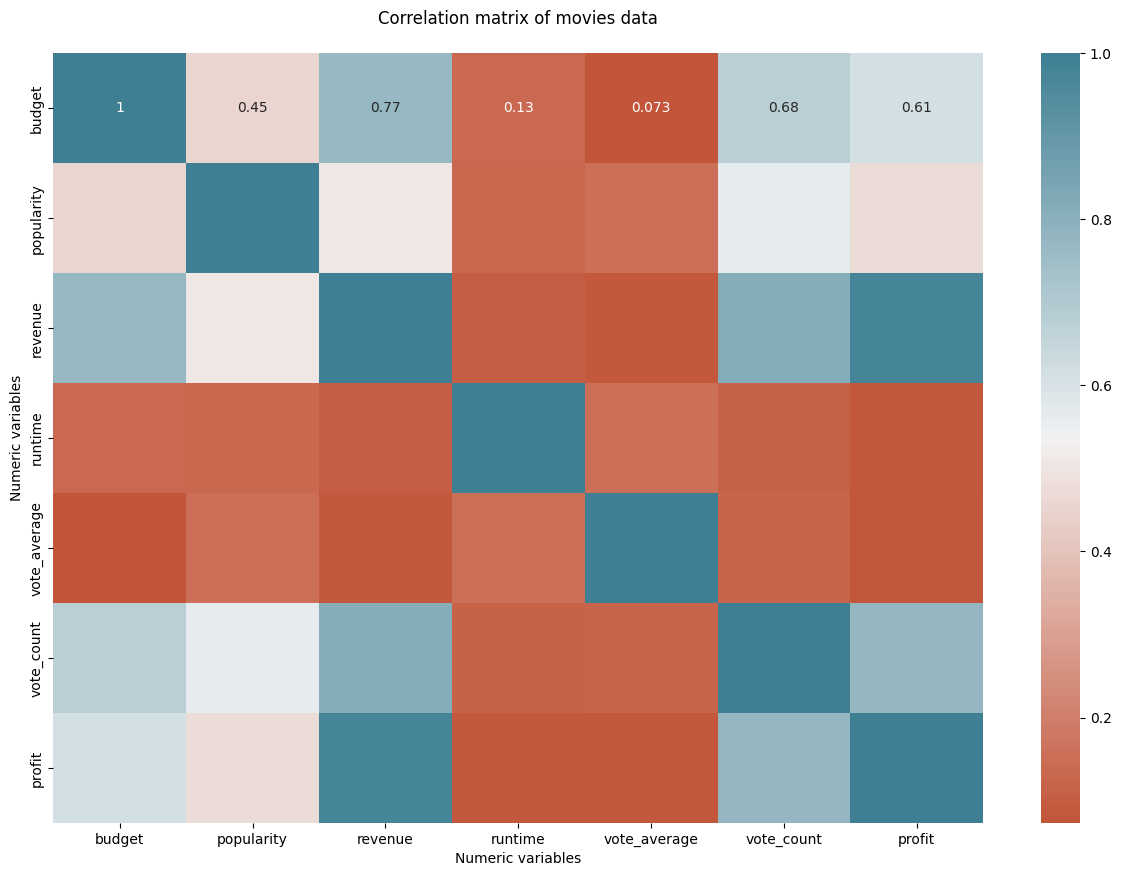

In [55]:
# correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
corrplot = sns.heatmap(movies[['budget','popularity','revenue','runtime','vote_average','vote_count','profit']].corr(),
cmap=sns.diverging_palette(20, 220, n=200), annot = True)

corrplot.set(xlabel='Numeric variables', ylabel='Numeric variables', title = "Correlation matrix of movies data\n")

plt.show()

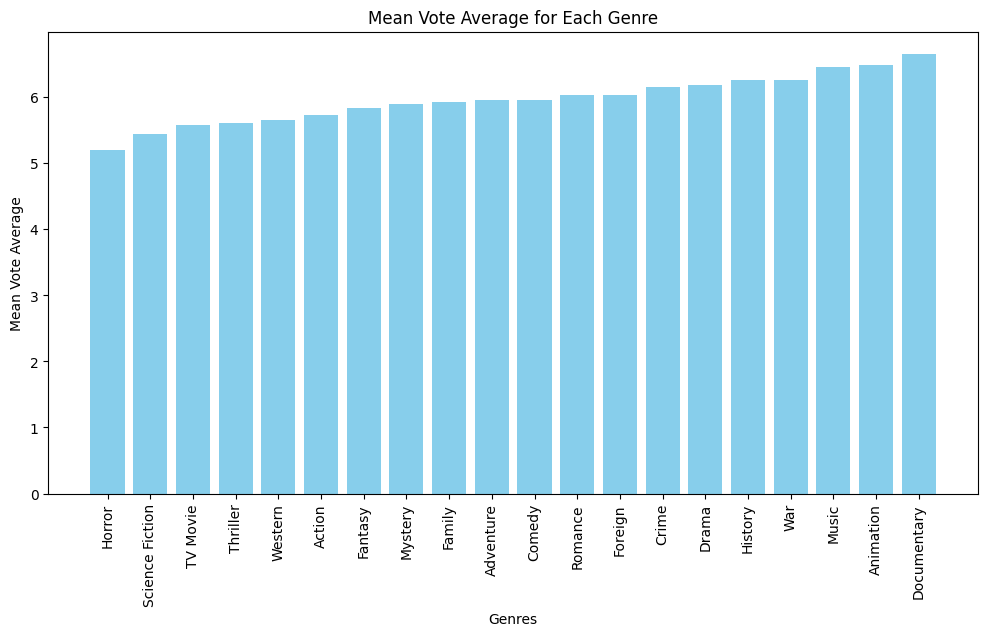

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
movies_exploded = movies.explode('genres')

movies1 = movies_exploded[movies_exploded['vote_count'] != 0]


df2 = movies1.groupby('genres')['vote_average'].mean().sort_values().reset_index(name='vote_average')

# Plotting the mean vote average for each genre
plt.figure(figsize=(12, 6))
plt.bar(df2['genres'], df2['vote_average'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Mean Vote Average')
plt.title('Mean Vote Average for Each Genre')
plt.xticks(rotation=90)
plt.show()



# Lets solve a question



## Are there substantial differences between English-language films and those in other languages in certain variables? Can we determine?

In [79]:
#lets solve
movies_unstack['month'] = movies_unstack['release_date'].str.split('-', expand=True)[1]
movies_unstack['year'] = movies_unstack['release_date'].str.split('-', expand=True)[0]
movies_unstack['month'].isna().sum()
movies_unstack.dropna(axis=0, how='any', inplace=True)
movies_unstack['month'].isna().sum()

0

In [88]:
movies_unstack['isen'] = ""
movies_unstack.loc[movies_unstack['original_language']=='en',"isen"] = "Yes"
movies_unstack.loc[movies_unstack['original_language']!='en',"isen"] = "No"
movies_unstack

,adult,Title,original_language,runtime,release_date,budget,id,overview,popularity,production_countries,...,tagline,video,vote_average,vote_count,profit,roi,gain,month,year,isen
0,False,Toy Story,en,81.0,1995-10-30,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",21.95,United States of America,...,,False,7.7,5415.0,343554033.0,11.451801,True,10,1995,Yes
1,False,Jumanji,en,104.0,1995-12-15,65000000.0,8844,When siblings Judy and Peter discover an encha...,17.02,United States of America,...,Roll the dice and unleash the excitement!,False,6.9,2413.0,197797249.0,3.043035,True,12,1995,Yes
2,False,Grumpier Old Men,en,101.0,1995-12-22,0.0,15602,A family wedding reignites the ancient feud be...,11.71,United States of America,...,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,0.0,0.000000,Unknown,12,1995,Yes
3,False,Waiting to Exhale,en,127.0,1995-12-22,16000000.0,31357,"Cheated on, mistreated and stepped on, the wom...",3.86,United States of America,...,Friends are the people who let you be yourself...,False,6.1,34.0,65452156.0,4.090760,True,12,1995,Yes
4,False,Father of the Bride Part II,en,106.0,1995-02-10,0.0,11862,Just when George Banks has recovered from his ...,8.39,United States of America,...,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,76578911.0,0.000000,True,02,1995,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45400,False,Robin Hood,en,104.0,1991-05-13,0.0,30840,"Yet another version of the classic epic, with ...",5.68,Canada,...,,False,5.7,26.0,0.0,0.000000,Unknown,05,1991,Yes
45402,False,Siglo ng Pagluluwal,tl,360.0,2011-11-17,0.0,111109,An artist struggles to finish his work while a...,0.18,Philippines,...,,False,9.0,3.0,0.0,0.000000,Unknown,11,2011,No
45403,False,Betrayal,en,90.0,2003-08-01,0.0,67758,"When one of her hits goes wrong, a professiona...",0.90,United States of America,...,A deadly game of wits.,False,3.8,6.0,0.0,0.000000,Unknown,08,2003,Yes
45404,False,Satana likuyushchiy,en,87.0,1917-10-21,0.0,227506,"In a small town live two brothers, one a minis...",0.00,Russia,...,,False,0.0,0.0,0.0,0.000000,Unknown,10,1917,Yes


In [89]:
movies_unstack.groupby('isen').agg({'budget':['max','min','mean'],
                                         'revenue':['max','min','mean'],
                                         'profit':['max','min','mean'],
                                         'runtime':['max','min','mean'],
                                         'vote_average':['mean'],
                                         'vote_count':['mean']})

budget                          revenue                     \
              max  min          mean           max  min          mean   
isen                                                                    
No    150000000.0  0.0  8.396946e+05  4.264809e+08  0.0  1.521991e+06   
Yes   380000000.0  0.0  5.626034e+06  2.787965e+09  0.0  1.521764e+07   

            profit                            runtime                  \
               max          min          mean     max  min       mean   
isen                                                                    
No    4.134809e+08 -150000000.0  6.822965e+05   931.0  0.0  96.546153   
Yes   2.550965e+09 -165710090.0  9.591606e+06  1256.0  0.0  93.213355   

     vote_average  vote_count  
             mean        mean  
isen                           
No       5.934010   32.451387  
Yes      5.498253  141.970500

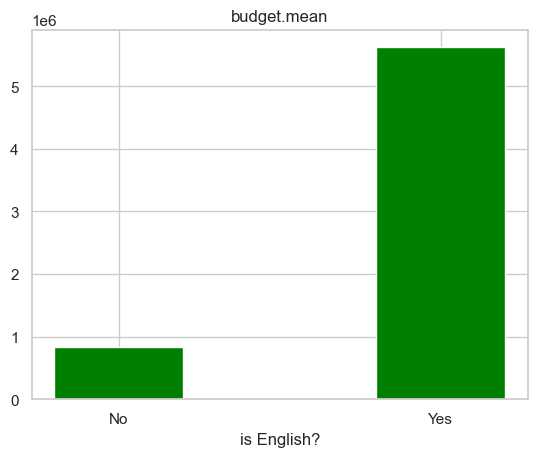

In [90]:
X=['No','Yes']
##Y=[840142,5623334]  
Y=[8.401420e+05	,5.623334e+06]
fig = plt.figure()
plt.bar(X,Y,0.4,color="green")
plt.xlabel("is English?")
plt.title("budget.mean")
plt.show() 

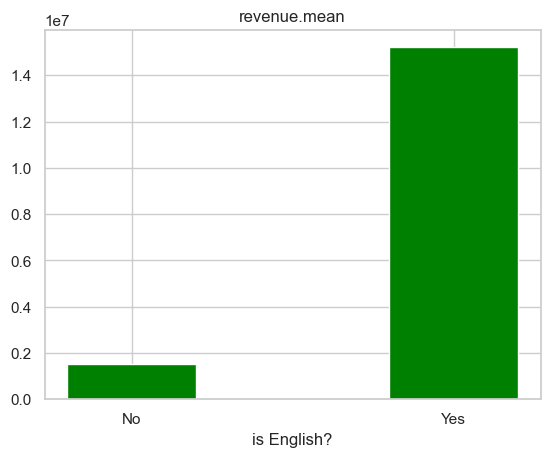

In [91]:
X=['No','Yes']
##Y=[840142,5623334]  
Y=[1.523008e+06,1.520866e+07]
fig = plt.figure()
plt.bar(X,Y,0.4,color="green")
plt.xlabel("is English?")
plt.title("revenue.mean")
plt.show()

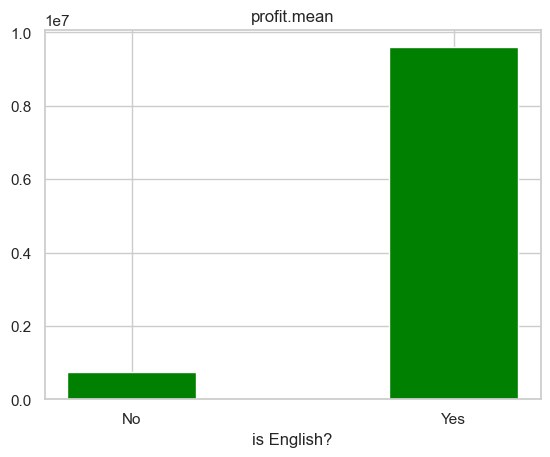

In [92]:
X=['No','Yes']
##Y=[840142,5623334]  
Y=[7.416062e+05,9.597381e+06]
fig = plt.figure()
plt.bar(X,Y,0.4,color="green")
plt.xlabel("is English?")
plt.title("profit.mean")
plt.show()

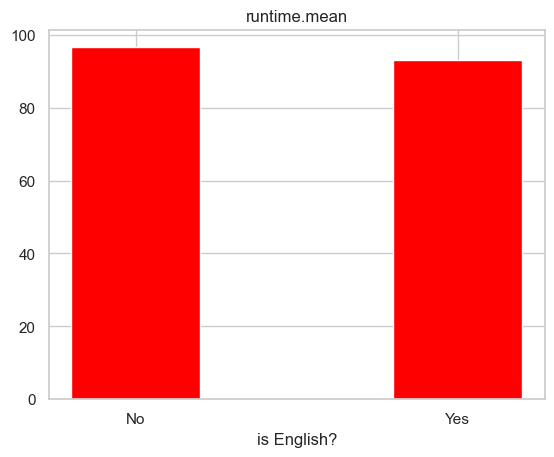

In [93]:
X=['No','Yes']
##Y=[840142,5623334]  
Y=[96.584122,93.199062]
fig = plt.figure()
plt.bar(X,Y,0.4,color="red")
plt.xlabel("is English?")
plt.title("runtime.mean")
plt.show()

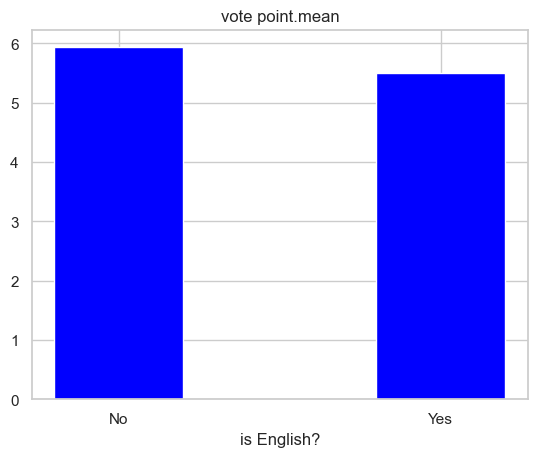

In [94]:
X=['No','Yes']
##Y=[840142,5623334]  
Y=[5.936584,5.497055]
fig = plt.figure()
plt.bar(X,Y,0.4,color="blue")
plt.xlabel("is English?")
plt.title("vote point.mean")
plt.show()

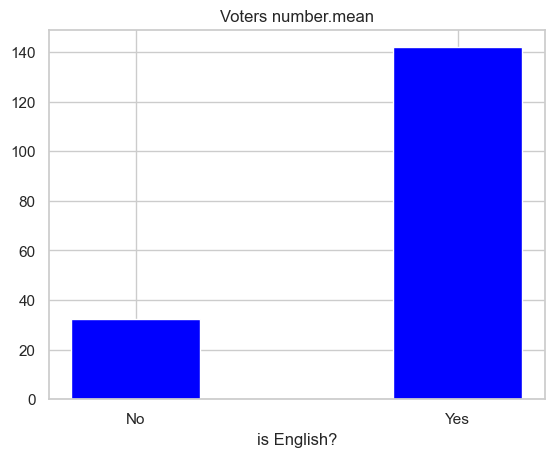

In [121]:
X=['No','Yes']
##Y=[840142,5623334]  
Y=[32.508671,141.888378]
fig = plt.figure()
plt.bar(X,Y,0.4,color="blue")
plt.xlabel("is English?")
plt.title("Voters number.mean")
plt.show()


In [129]:
movies['isen'] = ""
movies.loc[movies['original_language'] == 'en', "isen"] = "Yes"
movies.loc[movies['original_language'] != 'en', "isen"] = "No"

# Explode the 'genres' column to handle lists
movies_exploded = movies.explode('genres')

# Count occurrences of genres based on 'isen'
dddd = movies_exploded.groupby(['isen', 'genres']).size().reset_index(name='count')


print(dddd.head(10))  
print(dddd.tail(10))

  isen       genres  count
0   No       Action   1202
1   No    Adventure    384
2   No    Animation    364
3   No       Comedy   2487
4   No        Crime    442
5   No  Documentary    488
6   No        Drama   4455
7   No       Family    147
8   No      Fantasy    211
9   No      Foreign     70
   isen           genres  count
30  Yes          History    174
31  Yes           Horror   2163
32  Yes            Music    395
33  Yes          Mystery    401
34  Yes          Romance    712
35  Yes  Science Fiction    498
36  Yes         TV Movie    361
37  Yes         Thriller   1209
38  Yes              War    230
39  Yes          Western    340


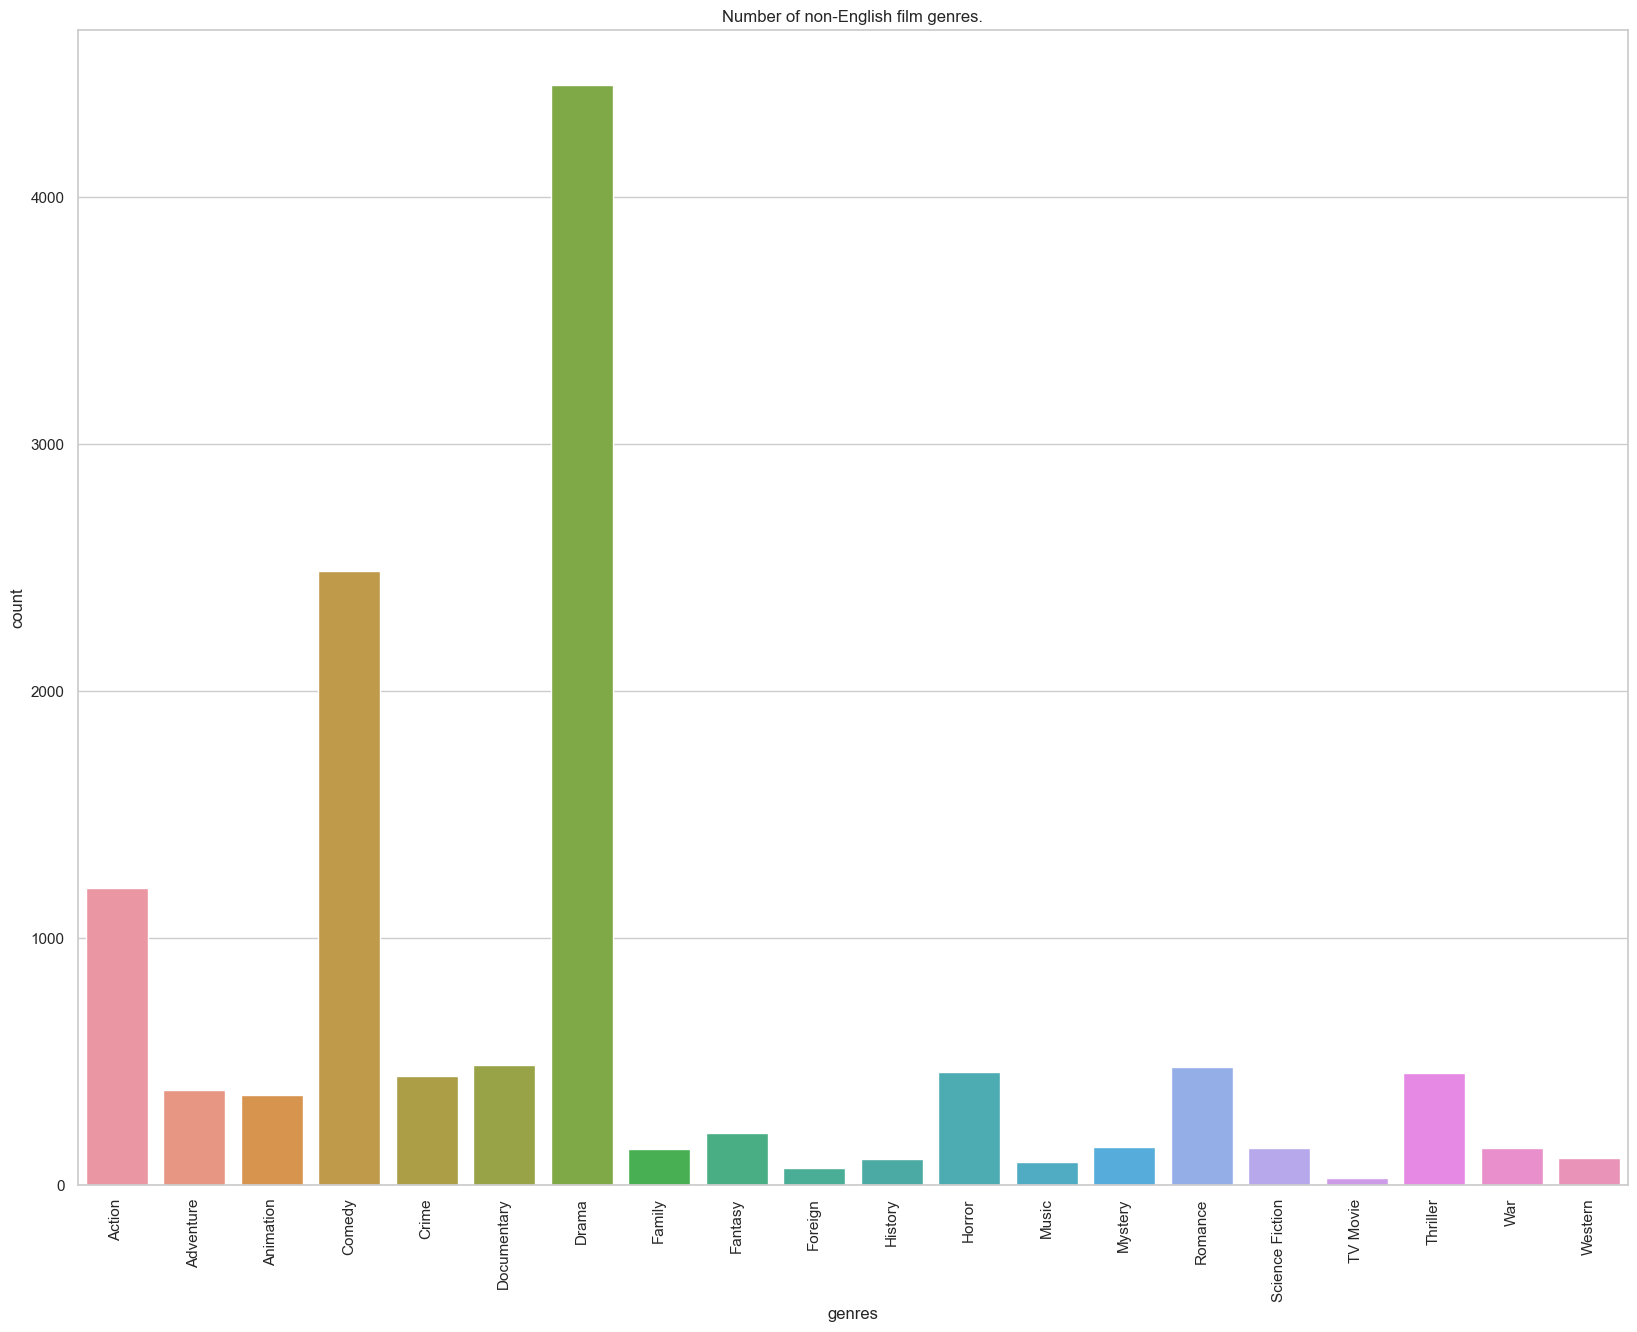

In [131]:
plt.figure(figsize=(20, 15))
sns.set_theme(style="whitegrid")
sns.barplot(x="genres", y="count", data=dddd.head(20))
plt.title("Number of non-English film genres.")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [133]:
movies_unstack['adult'].groupby(movies_unstack['isen']).value_counts()

isen  adult
No    False    13151
      True         4
Yes   False    32166
      True         4
Name: count, dtype: int64

In [134]:
movies_unstack['month'].groupby(movies_unstack['isen']).value_counts().sort_values()

isen  month
No    07        631
      06        787
      04        926
      05        927
      08        985
      02       1008
      03       1042
      11       1083
      12       1190
      10       1339
      09       1494
      01       1743
Yes   07       2009
      02       2016
      06       2361
      08       2407
      05       2408
      03       2506
      04       2526
      11       2577
      12       2592
      10       3269
      09       3340
      01       4159
Name: count, dtype: int64

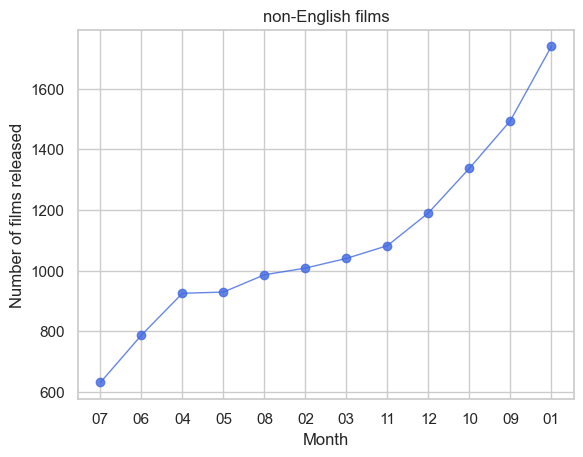

In [135]:
X=['07','06','04','05','08','02','03','11','12','10','09','01']
Y=[631,787,925,929,986,1008,1040,1082,1190,1337,1494,1739]  
fig = plt.figure()
plt.plot(X, Y, 'ro-', color='#4169E1', alpha=0.8, linewidth=1, label='一些数字')
plt.xlabel("Month")
plt.ylabel("Number of films released")
plt.title("non-English films")
plt.show() 

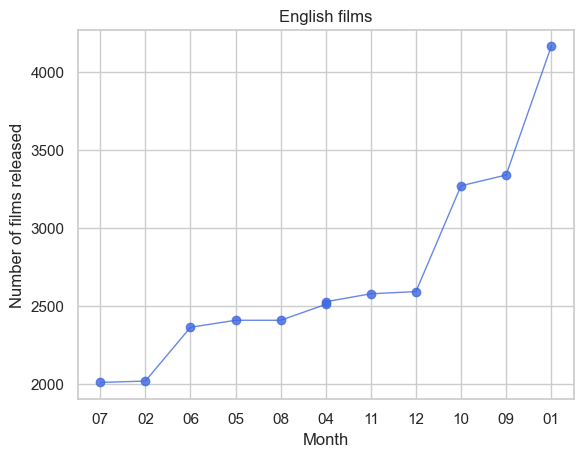

In [136]:
X=['07','02','06','05','08','04','04','11','12','10','09','01']
Y=[2009,2018,2363,2408,2408,2510,2527,2578,2592,3271,3340,4165]  
fig = plt.figure()
plt.plot(X, Y, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)
plt.xlabel("Month")
plt.ylabel("Number of films released")
plt.title("English films")
plt.show() 

In [138]:

movies_unstack['year'].groupby(movies_unstack['isen']).value_counts().sort_values(ascending=False)

isen  year
Yes   2014    1385
      2013    1318
      2015    1276
      2012    1200
      2011    1131
              ... 
No    1874       1
      1887       1
      1909       1
      1902       1
Yes   2020       1
Name: count, Length: 261, dtype: int64

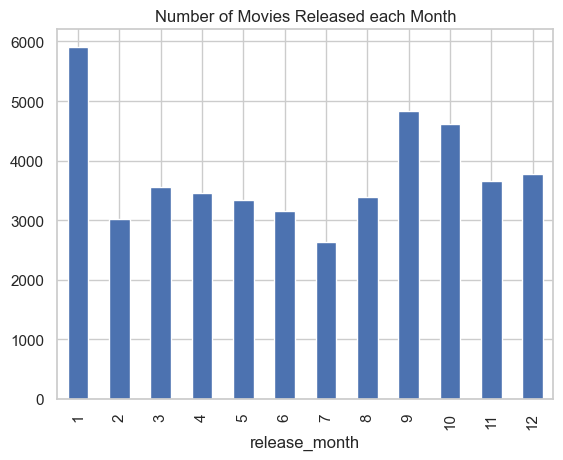

In [141]:
movies = movies[movies['release_date'] != 'unknown']
# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce', format='%Y-%m-%d')
# Create a new column for release month
movies['release_month'] = pd.DatetimeIndex(movies['release_date']).month
# Plotting
month_stat = movies.groupby("release_month").size()
month_stat.plot(kind="bar", title="Number of Movies Released each Month")
plt.show()

array([<Axes: title={'center': 'budget'}, xlabel='release_month'>,
       <Axes: title={'center': 'revenue'}, xlabel='release_month'>,
       <Axes: title={'center': 'vote_average'}, xlabel='release_month'>],
      dtype=object)

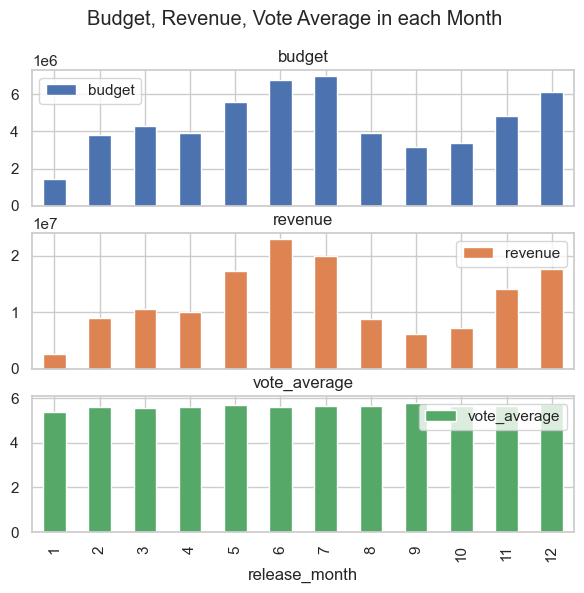

In [142]:
movies['budget']= movies['budget'].apply(pd.to_numeric)
# changes in budget
# changes in revenue
# changes in vote average
month_avg = movies.groupby("release_month").agg({'budget':'mean','revenue':'mean','vote_average':'mean'})
month_avg
month_avg.plot(subplots = True,kind = "bar",figsize=(7,6),title = "Budget, Revenue, Vote Average in each Month")